<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado Price Prediction for Avocado King

## System Configuration

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('max_rows', 30000)

import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # visualizing distributions data
from scipy import stats # visualizing probability distribution of statistical function

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table # to show full data table in multiple pages
%load_ext google.colab.data_table


In [2]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [3]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

fatal: destination path 'Avocado_King' already exists and is not an empty directory.


In [ ]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [4]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content
Avocado_King  sample_data


In [5]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [6]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King	       feature-explanations.xlsx  README.md
Avocado_King.ipynb     google-data.csv		  states.csv
dfnew_price.csv        outliers.csv
df_price_NA_check.csv  price-and-sales-data.csv


## Data Pre-Processing

1. Data pre-processing steps:
> * Read dataset  as pandas dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Show raw dataset table
> * Check for missing values
> * Handle missing values (if any)


2. Data Distribution
> * Visualization
> * Descriptive Statistics

### 1. Dataset: Price and Sales Data

In [7]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

In [8]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [10]:
## drop unused column such as Date because we already have year
df_price = df_price.drop('Date',1)

In [11]:
## see the dataset
df_price.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [12]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

Missing data:True


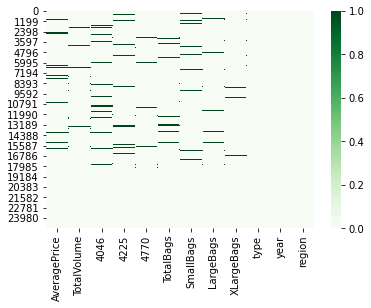

In [13]:
## see distribution of missing values in heat map
sns.heatmap(df_price.isna(),cmap='Greens')

Based on heatmap above, 
the dark marks represent missing values in our dataset. Column 'Date', 'type', 'year', 'region' does not have any missing values.

In [14]:
## See the missing data in dataset
df_price_NA_check = df_price.isna()
df_price_NA_check.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False


In [15]:
## Save as new .csv table to see whole data / for download
df_price_NA_check.to_csv('df_price_NA_check.csv',sep=',')

In [16]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

dfnew_price = df_price.fillna(df_price.mean())
dfnew_price.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.460000,9186.93000,529.530000,0.00,conventional,2015,Albany
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.790000,16707.15000,30108.640000,0.00,conventional,2015,Atlanta
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.680000,137146.07000,3990.610000,0.00,conventional,2015,BaltimoreWashington
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.620000,6064.30000,1691.320000,0.00,conventional,2015,Boise
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.130000,87406.84000,256.290000,0.00,conventional,2015,Boston
5,1.400000,116253.44,3267.97,55693.04,109.55,57182.880000,57182.88000,0.000000,0.00,conventional,2015,BuffaloRochester
6,0.930000,5777334.90,2843648.26,2267755.26,137479.64,528451.740000,477193.38000,47882.560000,3375.80,conventional,2015,California
7,1.190000,166006.29,29419.03,47220.75,38568.95,50797.560000,212419.88482,75899.237988,0.00,conventional,2015,Charlotte
8,1.110000,783068.03,30270.26,550752.19,124506.10,77539.480000,72888.46000,4651.020000,0.00,conventional,2015,Chicago
9,0.880000,228569.58,3274.30,168764.78,1447.06,295043.209471,17525.31000,37445.460000,112.67,conventional,2015,CincinnatiDayton


In [17]:
## check for dataset after impute missing values
print(f"Missing data:{dfnew_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

Missing data:False


In [18]:
## see new dataset after substitue missing values / for download
dfnew_price.to_csv('dfnew_price.csv',sep=',')

In [19]:
## Check for outliers
outliers = dfnew_price.describe()
outliers

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,25161.000000,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,25161.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.377521,3.660879e+06,1.265327e+06,1.187469e+06,1.027392e+05,1.210964e+06,8.530163e+05,3.517944e+05,25357.440983,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.120000,1.400096e+04,9.223600e+02,3.284480e+03,0.000000e+00,7.733600e+03,5.244730e+03,2.888900e+02,0.000000,2016.000000
50%,1.380000,1.363315e+05,1.225826e+04,3.093655e+04,2.520000e+02,5.105029e+04,3.537269e+04,4.757530e+03,0.000000,2017.000000
75%,1.620000,5.638524e+05,1.358825e+05,1.921057e+05,8.008860e+03,1.632409e+05,1.159123e+05,3.744130e+04,593.800000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


Based on above table, there is no outliers within the dataset because all mean values lie in between min and max values of the distribution.


In [20]:
## Save as new .csv file / for download
outliers.to_csv('outliers.csv',sep=',')

In [21]:
## Check for duplicate values in dataset
print('Duplicated values = ',sum(dfnew_price.duplicated()))

Duplicated values =  0


In [22]:
## Checking each features of the cleaned dataset
dfnew_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   4046          25161 non-null  float64
 3   4225          25161 non-null  float64
 4   4770          25161 non-null  float64
 5   TotalBags     25161 non-null  float64
 6   SmallBags     25161 non-null  float64
 7   LargeBags     25161 non-null  float64
 8   XLargeBags    25161 non-null  float64
 9   type          25161 non-null  object 
 10  year          25161 non-null  int64  
 11  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 2.3+ MB


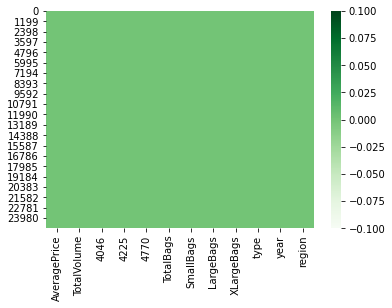

In [23]:
## see distribution of cleaned dataset in heat map
sns.heatmap(dfnew_price.isna(),cmap='Greens')

##### Conclusions
* Features = 13
* Instances = 25,161
* No duplicate values
* No null values after imputing the missing values with mean of the attribute itself
* Features with datatype = 'object' could be the machine learning classifier which are; 'type' & 'region'

### 2. Features Exploration
To understand how the variables are distributed. 

#### Data Distribution

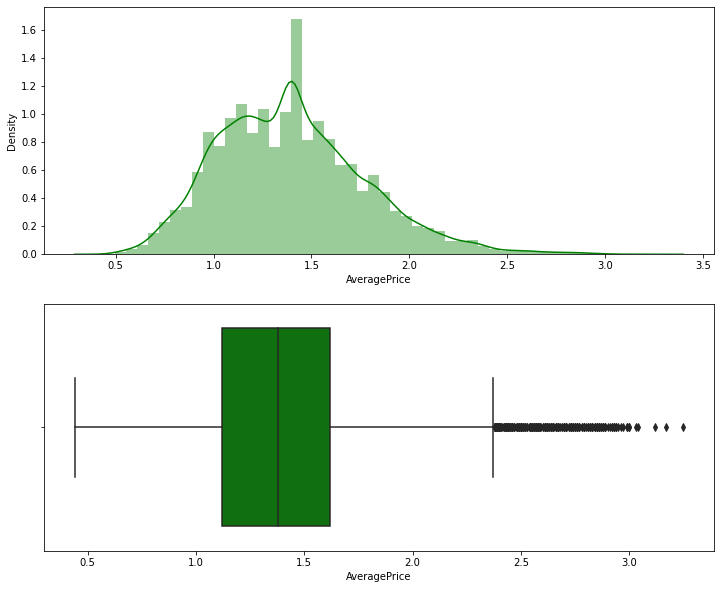

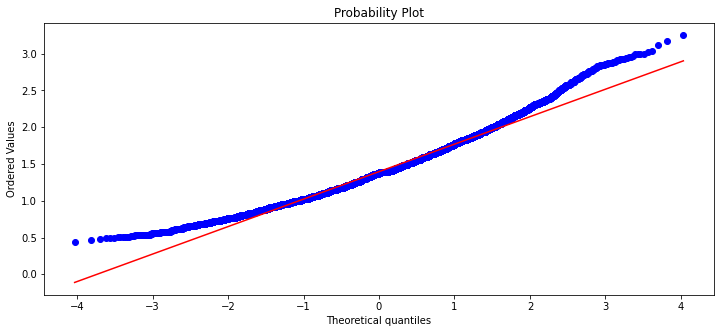

In [24]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
# Univriate distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(dfnew_price.AveragePrice, color='green', ax=ax[0])
# Box plot
sns.boxplot(dfnew_price.AveragePrice, color='green',ax=ax[1])

## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
# Probability distribution
stats.probplot(dfnew_price['AveragePrice'], plot=ax)
plt.show()

##### Conclusions from visualizing the data distribution

* All 3 plots above showed bimodal distribution which telling us that we have 2 local maximum.
* As discussed earlier, our potential classifier could be Type and Region which in this case Type has 2 class (Organic & Conventional)

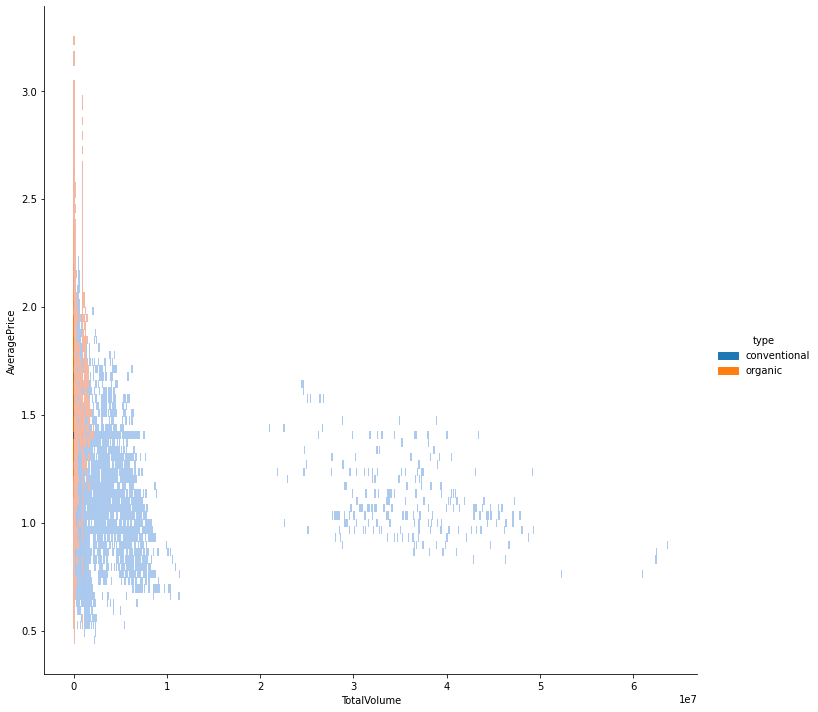

In [25]:
# Bivariate distribution plot of average price against total volume for each avocade type (class: Organic & Conventional)
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='type',height=10)

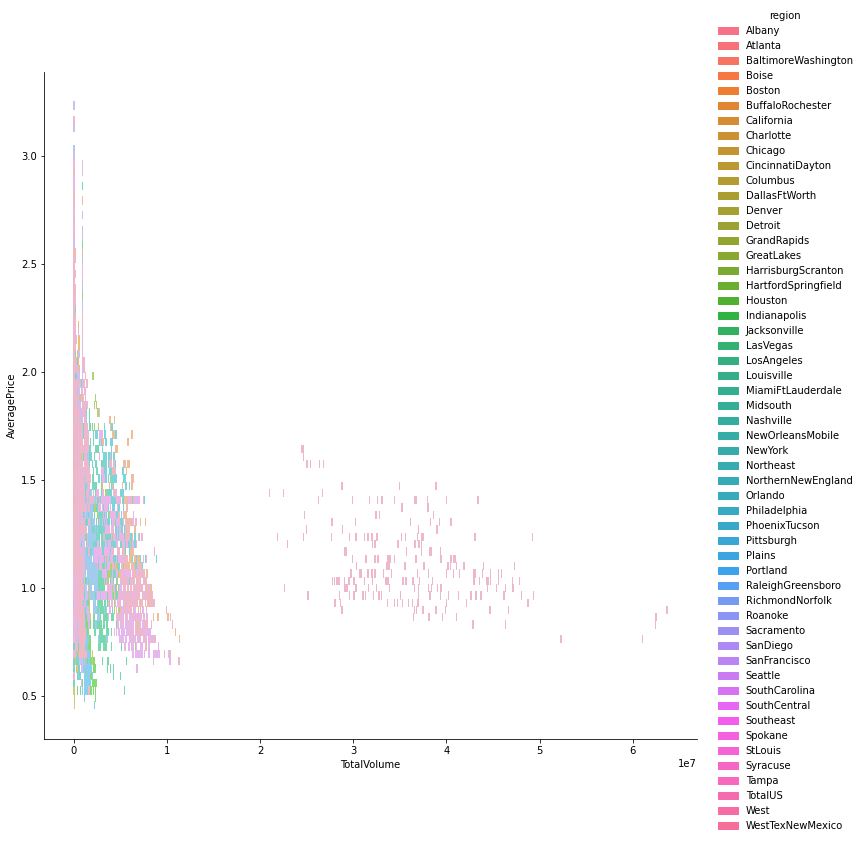

In [26]:
# Bivariate distribution plot of average price against total volume for all region
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='region',height=10)

##### Conclusions from Bivariate Distribution plot

* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Organic avocado was selling at higher price compared to conventional avocado.
* It is better to get dataset about states so that it can be group into region (East, West, South, North) for easier classification.

#### Descriptive Statistics
* Skewness
* Kurtosis

**Skewness**
* Measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).

In [27]:
print("Skewness: %f" % dfnew_price['AveragePrice'].skew())

Skewness: 0.602213


**Kurtosis**
* Measure the heaviness of distribution tails w.r.t. skewness.

In [28]:
## Kurtosis: Measure heaviness of the distribution tails
print("Kurtosis: %f" % dfnew_price['AveragePrice'].kurt())

Kurtosis: 0.558097


##### Conclusions
* If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
***If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.**
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
***Positive Kurtosis value means more data in the tail of the distribution.**
* Excess kurtosis = kurtosis - 3 = -2.442; which represent that we have lighter tail than normal distribution.

### 3. Feature Extraction

#### Class: 'type'


In [29]:
df_conventional = dfnew_price[dfnew_price['type'] == 'conventional']
print("Conventional Avocado = ",df_conventional.shape)

df_organic = dfnew_price[dfnew_price['type'] == 'organic']
print("Organic Avocado = ",df_organic.shape)

Conventional Avocado =  (12582, 12)
Organic Avocado =  (12579, 12)


Conventional avocado has 3 more data points than organic avocado

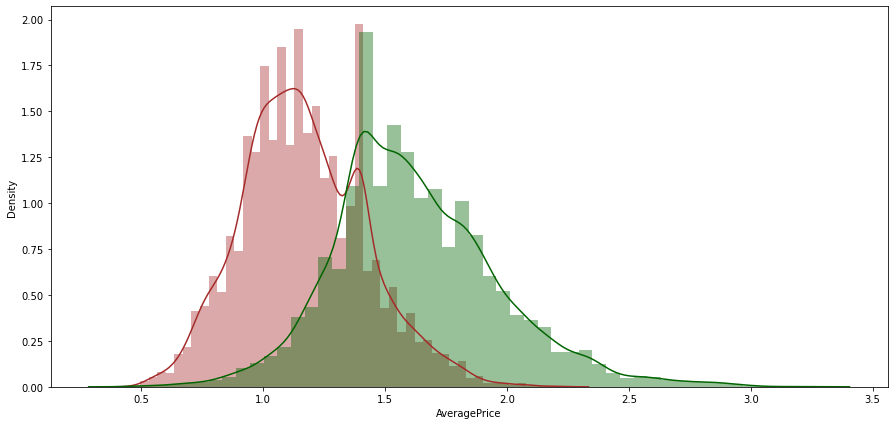

In [30]:
## Create histogram to see data distribution of both class in 'type'

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
sns.distplot(df_conventional['AveragePrice'],color='brown') # conventional avocado
sns.distplot(df_organic['AveragePrice'],color='darkgreen') # organic avocado
plt.show()

In [31]:
## Calculate 'Measure of Spread' for AveragePrice of the CONVENTIONAL avocado dataset
df_conventional['AveragePrice'].describe()

count    12582.000000
mean         1.167764
std          0.252855
min          0.460000
25%          0.990000
50%          1.150000
75%          1.340000
max          2.220000
Name: AveragePrice, dtype: float64

In [32]:
## Calculate 'Measure of Spread' for AveragePrice of the ORGANIC avocado dataset
df_organic['AveragePrice'].describe()

count    12579.000000
mean         1.624326
std          0.341897
min          0.440000
25%          1.396018
50%          1.580000
75%          1.820000
max          3.250000
Name: AveragePrice, dtype: float64

Visualize the 'Measure of Spread' calculated for AveragePrice of both class using Boxplot function.
https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/

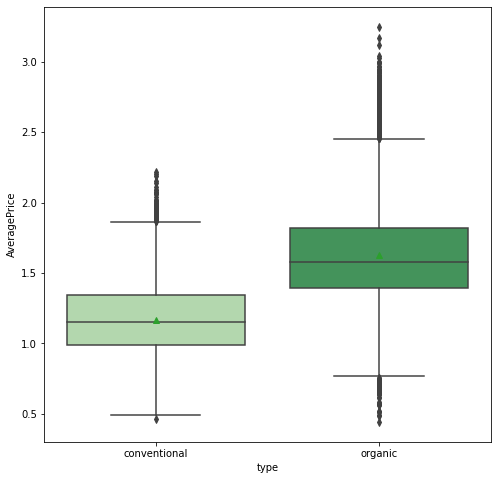

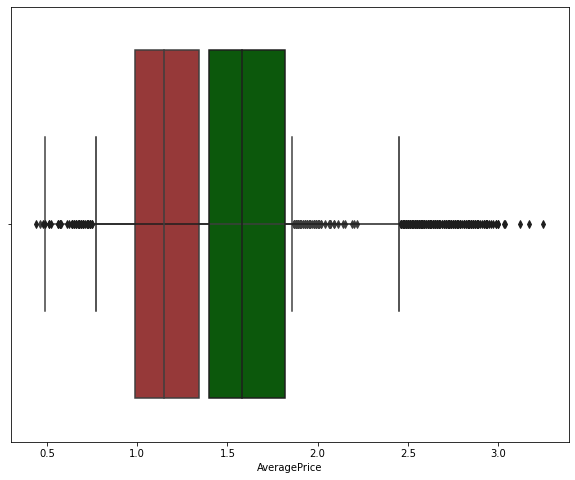

In [33]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.boxplot(x='type',y='AveragePrice',data=dfnew_price,palette='Greens',showmeans=True)
plt.show()

# Can also visualize in combined boxplot by running below code
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.boxplot(df_conventional['AveragePrice'],color='brown')
sns.boxplot(df_organic['AveragePrice'],color='darkgreen')
plt.show()

#### Class: 'region'


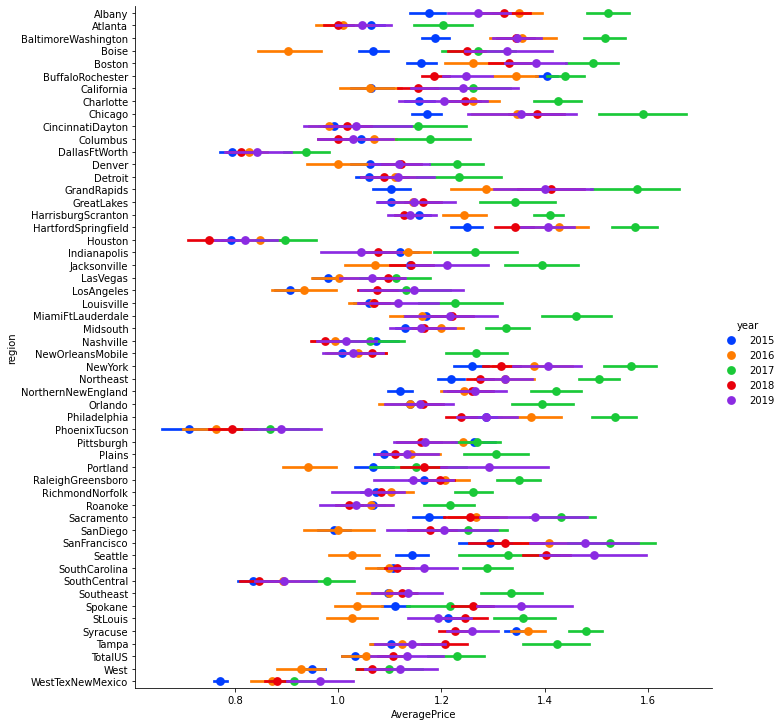

In [34]:
## Average price of CONVENTIONAL avocado in each year by region
conventional = dfnew_price['type']=='conventional'
conv_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=dfnew_price[conventional],hue='year',size=10,palette='bright',join=False)

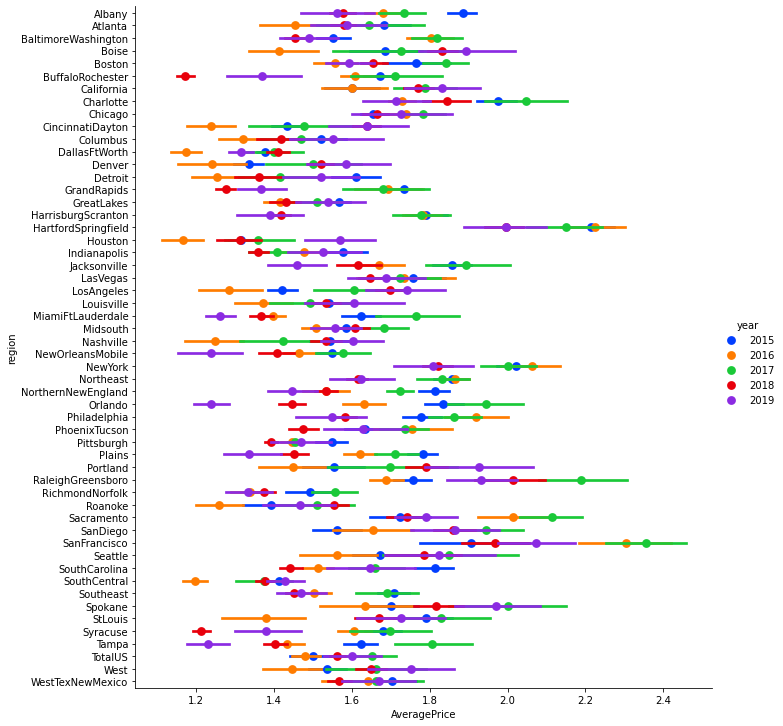

In [35]:
## Average price of ORGANIC avocado in each year by region
organic = dfnew_price['type']=='organic'
organic_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=dfnew_price[organic],hue='year',size=10,palette='bright',join=False)

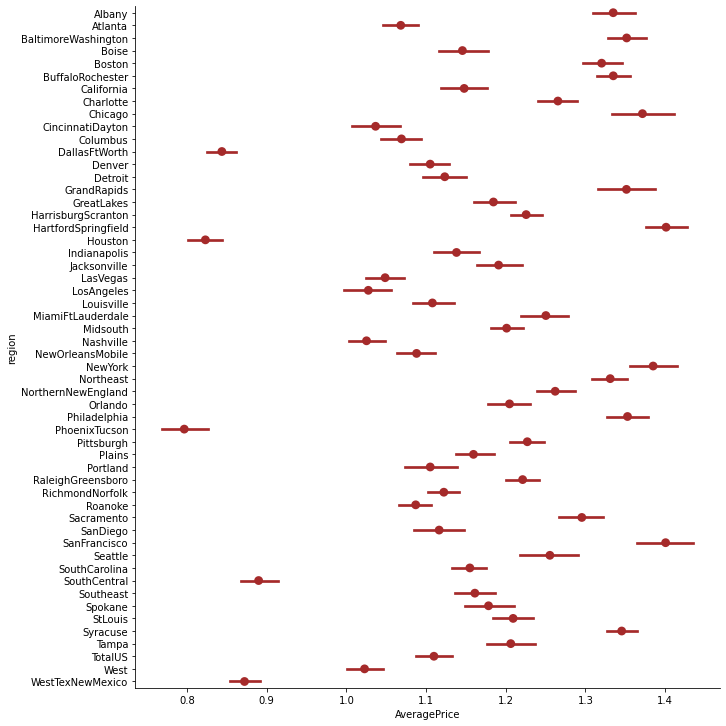

In [36]:
## Average price of conventional avocado by region (average from year 2015-2019)
conventional_factorplot = sns.factorplot('AveragePrice','region',data=dfnew_price[conventional],color='brown',size=10,join=False,)

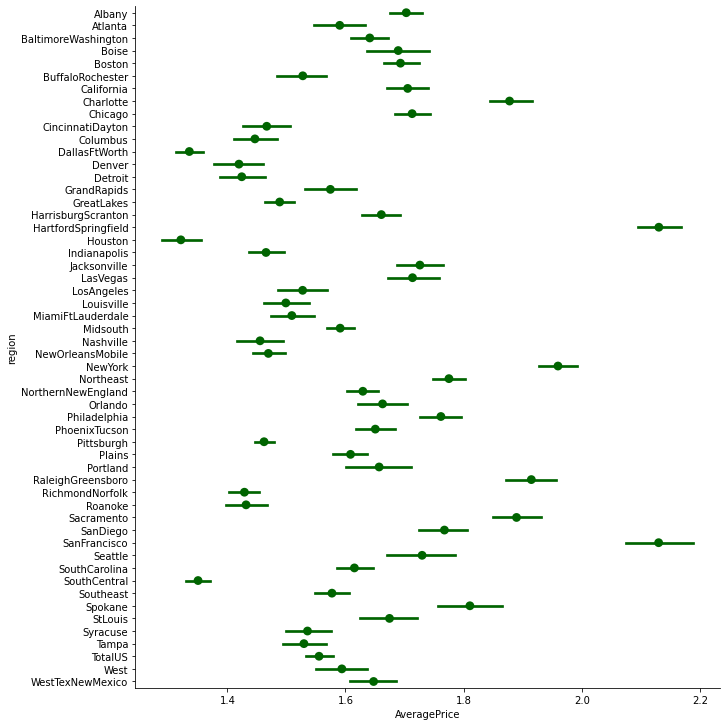

In [37]:
## Average price of organic avocado by region (average from year 2015-2019)
organic_factorplot = sns.factorplot('AveragePrice','region',data=dfnew_price[organic],color='darkgreen',size=10,join=False)

#### Correlation Matrix

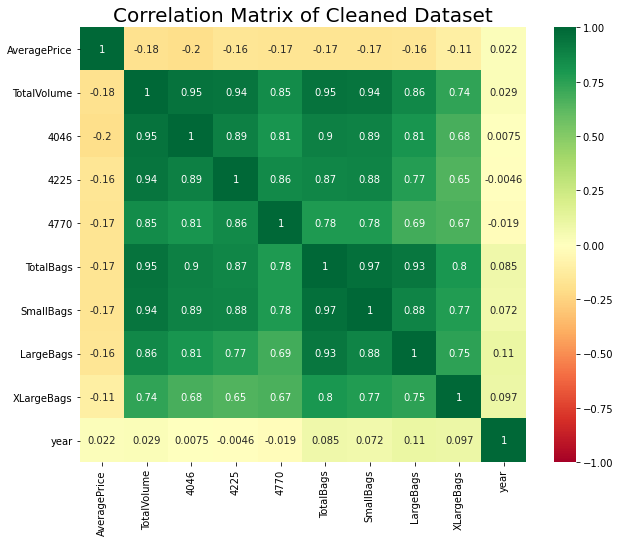

In [38]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Cleaned Dataset", fontsize=20)
sns.heatmap(dfnew_price.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

#### Conclusions
* Not only class 'type' that affect the average price but also 'region'.
* AveragePrice for each region is different for every year.
* 'region' is not suitable to be our classifier because of the imbalanced data points.
* 'type' shows more balanced data points = ML classifier
* Based on correlation matrix, 'TotalVolume' and 'TotalBags' show strongest correlation.


In [39]:
## new dataframe after removing region column
df_training = dfnew_price.drop('region',1)
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   4046          25161 non-null  float64
 3   4225          25161 non-null  float64
 4   4770          25161 non-null  float64
 5   TotalBags     25161 non-null  float64
 6   SmallBags     25161 non-null  float64
 7   LargeBags     25161 non-null  float64
 8   XLargeBags    25161 non-null  float64
 9   type          25161 non-null  object 
 10  year          25161 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.1+ MB


In [40]:
## new dataframe separated by type = conventional
df_train_conventional = df_training[dfnew_price['type'] == 'conventional']

df_train_conventional.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015


In [41]:
## new dataframe separated by type = organic
df_train_organic = df_training[dfnew_price['type'] == 'organic']

df_train_organic.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year
54,1.79,1373.95,57.42,153.88,0.00,1162.650000,1162.65000,0.00,4405.638467,organic,2015
55,1.76,3846.69,1500.15,938.35,0.00,1408.190000,1071.35000,336.84,0.000000,organic,2015
56,1.29,19137.28,8040.64,6557.47,657.48,295043.209471,212419.88482,0.00,0.000000,organic,2015
57,1.64,1505.12,1.27,1129.50,0.00,374.350000,186.67000,187.68,0.000000,organic,2015
58,1.83,2192.13,8.66,939.43,0.00,1244.040000,1244.04000,0.00,0.000000,organic,2015


## Feature Engineering

##### model 1

In [ ]:
from sklearn.model_selection import train_test_split

X = df_training.drop('AveragePrice',1)
y = df_training['AveragePrice']
print('Shape of X and y Dataset = ', X.shape, y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of Training Dataset = ', X_train.shape, y_train.shape)
print('Shape of Test Dataset     = ', X_test.shape, y_test.shape)

##### model 4

In [42]:
from sklearn.model_selection import train_test_split
X = df_train_conventional.drop('AveragePrice',axis = 1)
Y = df_train_conventional['AveragePrice']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [43]:
X_train = X_train.drop('type',axis = 1)
X_test = X_test.drop('type',axis = 1)

## Prediction Machine Learning Model

##### model 4

In [44]:
from sklearn.linear_model import LinearRegression as Linreg
from sklearn.metrics import r2_score as rsc
regressor = Linreg()
regressor.fit(X_train,Y_train)

pred_train = regressor.predict(X_train)
print("R2 Score for training = ",rsc(Y_train,pred_train))

pred_test = regressor.predict(X_test)
print("R2 Score for test     = ", rsc(Y_test,pred_test))

R2 Score for training =  0.07578509387608778
R2 Score for test     =  0.07700238850023466


Low R2 score means this model is not suitable to precise predictions. Hence, we need to add more numerical variables to the data.

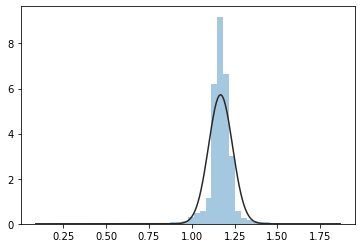

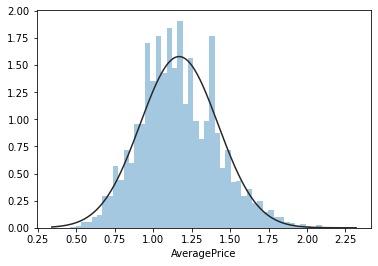

In [45]:
from scipy.stats import norm

plt.figure()
sns.distplot(pred_train,fit = norm,kde = False)

plt.figure()
sns.distplot(Y_train,fit = norm,kde = False)

In [46]:
from sklearn.metrics import mean_squared_error
print('train RMSE is = ',mean_squared_error(Y_train,pred_train,squared = False))
print('test RMSE is  = ',mean_squared_error(Y_test,pred_test,squared = False))

train RMSE is =  0.24320338003726336
test RMSE is  =  0.24240010917027202


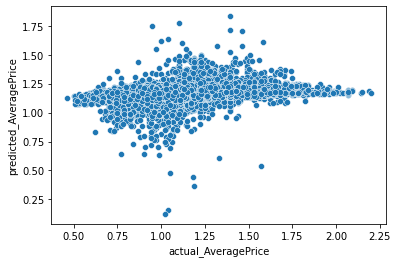

In [47]:
small_df = pd.DataFrame()
small_df['actual_AveragePrice'] = Y_train
small_df['predicted_AveragePrice'] = pred_train
sns.scatterplot(data = small_df,x='actual_AveragePrice',y = 'predicted_AveragePrice')

##### model 4 another Regression

In [48]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [49]:
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

predictions

array([1.2901529 , 1.13054745, 1.15741215, ..., 1.1347095 , 1.09410999,
       1.15743084])

Text(0, 0.5, 'Predictions')

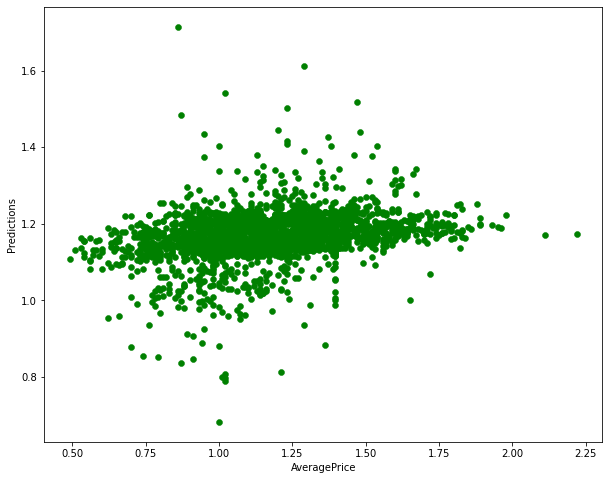

In [51]:
## Plotting model
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

plt.scatter(Y_test, predictions,c='green', linewidths=0.5)
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [53]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', model.score(X_test, Y_test))

Accuracy score of Linear Regression model =  0.07700238850023466


##### model 1
https://www.kaggle.com/mruanova/predict-avocado-prices-using-linear-regression/notebook#Step-6-Missing-Data

In [54]:
df_train_conventional.head(100)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year
0,1.220000,4.087328e+04,2.819500e+03,2.828742e+04,49.90000,9.716460e+03,9.186930e+03,529.530000,0.000000,conventional,2015
1,1.000000,4.350215e+05,3.643024e+05,2.382116e+04,82.15000,4.681579e+04,1.670715e+04,30108.640000,0.000000,conventional,2015
2,1.396018,7.880251e+05,5.398731e+04,5.529060e+05,39995.03000,1.411367e+05,1.371461e+05,3990.610000,0.000000,conventional,2015
3,1.010000,8.003432e+04,4.456212e+04,2.496423e+04,2752.35000,7.755620e+03,6.064300e+03,1691.320000,0.000000,conventional,2015
4,1.020000,4.917380e+05,7.193870e+03,3.967522e+05,128.82000,8.766313e+04,8.740684e+04,256.290000,0.000000,conventional,2015
5,1.400000,1.162534e+05,3.267970e+03,5.569304e+04,109.55000,5.718288e+04,5.718288e+04,0.000000,0.000000,conventional,2015
6,0.930000,5.777335e+06,2.843648e+06,2.267755e+06,137479.64000,5.284517e+05,4.771934e+05,47882.560000,3375.800000,conventional,2015
7,1.190000,1.660063e+05,2.941903e+04,4.722075e+04,38568.95000,5.079756e+04,2.124199e+05,75899.237988,0.000000,conventional,2015
8,1.110000,7.830680e+05,3.027026e+04,5.507522e+05,124506.10000,7.753948e+04,7.288846e+04,4651.020000,0.000000,conventional,2015
9,0.880000,2.285696e+05,3.274300e+03,1.687648e+05,1447.06000,2.950432e+05,1.752531e+04,37445.460000,112.670000,conventional,2015


In [55]:
from scipy import stats

X = df_train_conventional.year
y = df_train_conventional['AveragePrice']

slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy

def modelPrediction(x):
  return slope * x + intercept

model = list(map(modelPrediction, X)) # scipy

In [56]:
X_pred = 2020
y_pred = modelPrediction(X_pred)
print('Model Prediction of conventional avocado AveragePrice in 2020')
avocado_price = round(y_pred, 2)
print('$ {} USD'.format(avocado_price))

Model Prediction of conventional avocado AveragePrice in 2020
$ 1.24 USD


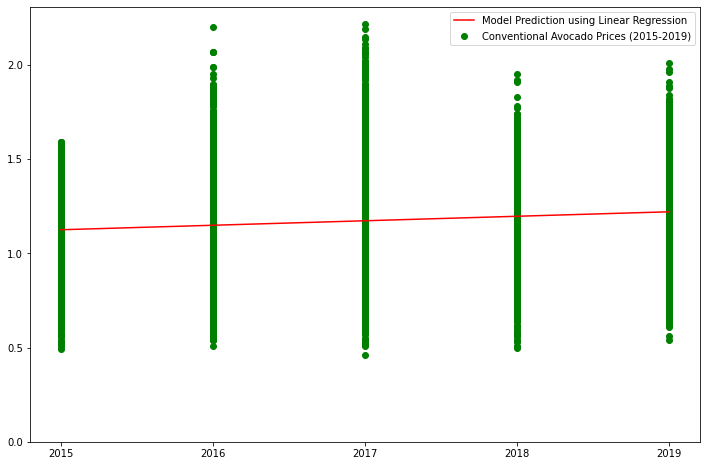

In [57]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

plt.scatter(X, y,color='green',) # Scatter Plot
plt.plot(X, model, color='red')
plt.ylim(ymin=0) # starts at zero
plt.xticks(np.arange(min(X), max(X)+1))
plt.legend(['Model Prediction using Linear Regression', 'Conventional Avocado Prices (2015-2019)'])
plt.show()

In [58]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', model.score(X_pred, y_pred))

AttributeError: ignored

##### model 3

In [ ]:
from sklearn.linear_model import LinearRegression as Linreg
from sklearn.metrics import r2_score as rsc
regressor = Linreg()
regressor.fit(X_train,y_train)
pred_train = regressor.predict(X_train)
print(rsc(y_train,pred_train))
pred_test = regressor.predict(X_test)
print(rsc(Y_test,pred_test))

## Validation
Our dataset is considered small enough and no single split is can give satisfactory variance in estimation. Hence, cross-validation of data is proposed.

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20)
print('Shape of training dataset = ', X_train.shape, y_train.shape)
print('Shape of test dataset = ', X_val.shape, y_val.shape)

In [ ]:
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

In [ ]:
model = lm.fit(X_train, y_train)
predictions_val = lm.predict(X_val)

predictions_val

In [ ]:
## Plotting model

plt.scatter(y_val, predictions_val)
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [ ]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', model.score(X_val, y_val))

**Conclusion**
* Model accuracy has improved after do cross-validation.